The goal for this notebook is to do a quick comparison of the obesity prevelance in Tennessee vs the rest of the U.S. this should be shown at the beginning of the presentation before I do a deep dive on where different parts of obesity prevelance fall by county in TN. Still not sure if i want to include the median household income along with it or not.

dataframes: sorted_obesity_by_state, household_income_by_state

data question: What are the current obesity rates in the state of Tennessee and how do they compare to the rest of the US?

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
obesity_by_state = pd.read_csv('../data/USA_Obesity_prevalence_by_state_2021.csv')

In [3]:
obesity_by_state

,State,Prevalence,95% CI
0,Alabama,39.9,"(37.9, 41.8)"
1,Alaska,33.5,"(31.5, 35.5)"
2,Arizona,31.3,"(30.0, 32.6)"
3,Arkansas,38.7,"(36.6, 40.8)"
4,California,27.6,"(26.1, 29.1)"
5,Colorado,25.1,"(24.1, 26.2)"
6,Connecticut,30.4,"(28.9, 31.9)"
7,Delaware,33.9,"(31.8, 36.1)"
8,District of Columbia,24.7,"(22.6, 26.9)"
9,Florida,No data,No data


In [4]:
obesity_by_state = obesity_by_state.drop([9, 11, 40, 48], axis=0).reset_index(drop=True)
obesity_by_state

,State,Prevalence,95% CI
0,Alabama,39.9,"(37.9, 41.8)"
1,Alaska,33.5,"(31.5, 35.5)"
2,Arizona,31.3,"(30.0, 32.6)"
3,Arkansas,38.7,"(36.6, 40.8)"
4,California,27.6,"(26.1, 29.1)"
5,Colorado,25.1,"(24.1, 26.2)"
6,Connecticut,30.4,"(28.9, 31.9)"
7,Delaware,33.9,"(31.8, 36.1)"
8,District of Columbia,24.7,"(22.6, 26.9)"
9,Georgia,33.9,"(32.2, 35.6)"


In [5]:
sorted_obesity_by_state = obesity_by_state.sort_values(by='Prevalence', ascending=False)
sorted_obesity_by_state

,State,Prevalence,95% CI
47,West Virginia,40.6,"(39.1, 42.1)"
16,Kentucky,40.3,"(38.5, 42.2)"
0,Alabama,39.9,"(37.9, 41.8)"
35,Oklahoma,39.4,"(37.7, 41.2)"
23,Mississippi,39.1,"(37.1, 41.1)"
3,Arkansas,38.7,"(36.6, 40.8)"
17,Louisiana,38.6,"(36.7, 40.6)"
40,South Dakota,38.4,"(35.6, 41.4)"
34,Ohio,37.8,"(36.6, 39.0)"
24,Missouri,37.3,"(35.9, 38.7)"


In [6]:
household_income_by_state = pd.read_excel('../data/USA_median_household_income_2021_by_state.xlsx', sheet_name='Data')

In [7]:
household_income_by_state

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,"U.S. median household income 2021, by state",NaN
2,NaN,Median household income in the United States i...,NaN
3,NaN,NaN,NaN
4,NaN,Maryland,97332.0
5,NaN,District of Columbia,90640.0
6,NaN,New Hampshire,88841.0
7,NaN,New Jersey,88559.0
8,NaN,Utah,87649.0
9,NaN,Washington,87648.0


In [8]:
household_income_by_state = household_income_by_state.drop(range(4)).reset_index(drop=True)
household_income_by_state

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,Maryland,97332.0
1,NaN,District of Columbia,90640.0
2,NaN,New Hampshire,88841.0
3,NaN,New Jersey,88559.0
4,NaN,Utah,87649.0
5,NaN,Washington,87648.0
6,NaN,Massachusetts,86566.0
7,NaN,Colorado,84954.0
8,NaN,Hawaii,82199.0
9,NaN,Oregon,81855.0


In [9]:
household_income_by_state = household_income_by_state.drop("Unnamed: 0", axis=1)
household_income_by_state = household_income_by_state.rename(columns={"Unnamed: 1": "States", "Unnamed: 2": "Median Household Income"})

In [10]:
household_income_by_state

,States,Median Household Income
0,Maryland,97332.0
1,District of Columbia,90640.0
2,New Hampshire,88841.0
3,New Jersey,88559.0
4,Utah,87649.0
5,Washington,87648.0
6,Massachusetts,86566.0
7,Colorado,84954.0
8,Hawaii,82199.0
9,Oregon,81855.0


C:\Users\scost\AppData\Local\Temp\ipykernel_1708\2023200575.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{int(tick)}%' for tick in ax.get_xticks()])


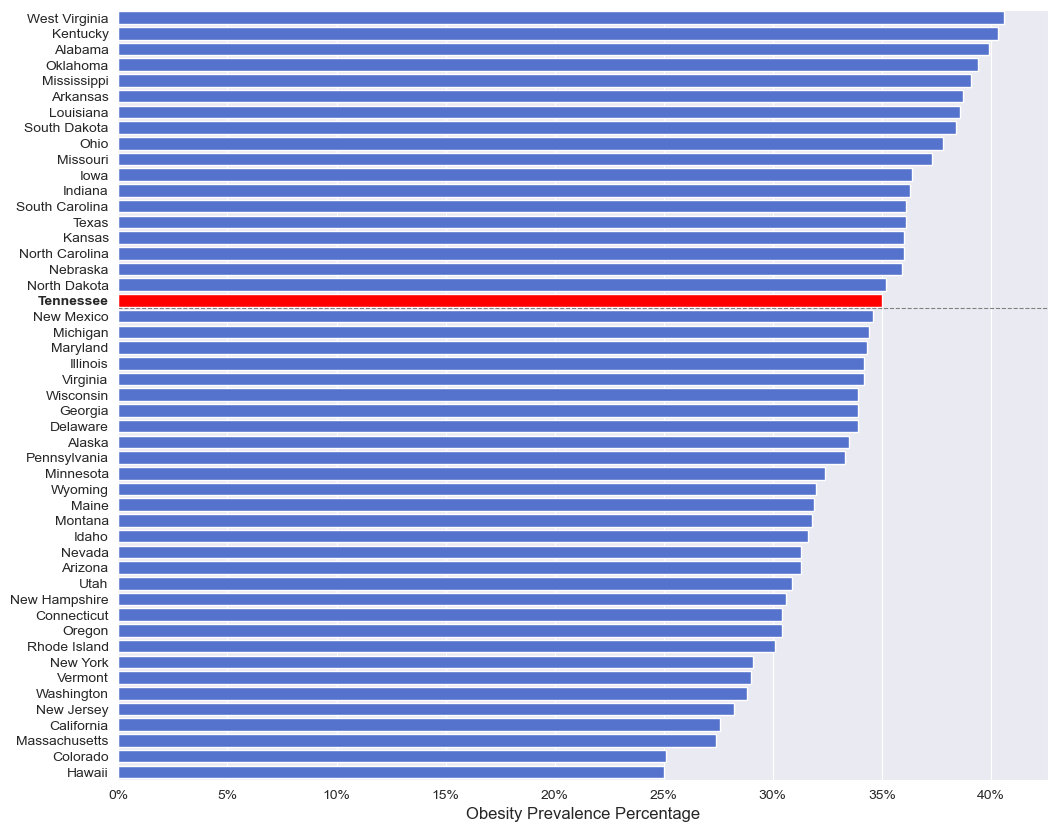

In [23]:
# Create a dataframe from the provided data
data = {
    'State': ['West Virginia', 'Kentucky', 'Alabama', 'Oklahoma', 'Mississippi', 'Arkansas', 'Louisiana', 'South Dakota',
              'Ohio', 'Missouri', 'Iowa', 'Indiana', 'Texas', 'South Carolina', 'Kansas', 'North Carolina', 'Nebraska',
              'North Dakota', 'Tennessee', 'New Mexico', 'Michigan', 'Maryland', 'Illinois', 'Virginia', 'Georgia',
              'Delaware', 'Wisconsin', 'Alaska', 'Pennsylvania', 'Minnesota', 'Wyoming', 'Maine', 'Montana', 'Idaho',
              'Nevada', 'Arizona', 'Utah', 'New Hampshire', 'Connecticut', 'Oregon', 'Rhode Island', 'New York',
              'Vermont', 'Washington', 'New Jersey', 'California', 'Massachusetts', 'Colorado', 'Hawaii'],
    'Prevalence': [40.6, 40.3, 39.9, 39.4, 39.1, 38.7, 38.6, 38.4, 37.8, 37.3, 36.4, 36.3, 36.1, 36.1, 36.0, 36.0,
                   35.9, 35.2, 35.0, 34.6, 34.4, 34.3, 34.2, 34.2, 33.9, 33.9, 33.9, 33.5, 33.3, 32.4, 32.0, 31.9,
                   31.8, 31.6, 31.3, 31.3, 30.9, 30.6, 30.4, 30.4, 30.1, 29.1, 29.0, 28.8, 28.2, 27.6, 27.4, 25.1,
                   25.0]
}

df = pd.DataFrame(data)

# Sort the dataframe by prevalence in descending order
df = df.sort_values('Prevalence', ascending=False)

# Set the figure size and style
plt.figure(figsize=(12, 10))
sns.set_style("darkgrid")

# Create the bar plot using seaborn
ax = sns.barplot(x='Prevalence', y='State', data=df, color='royalblue')

# Highlight Tennessee's bar with a different color
tn_index = df[df['State'] == 'Tennessee'].index[0]
ax.patches[tn_index].set_facecolor('red')

# Add a vertical line to separate Tennessee from other states
ax.axhline(tn_index + 0.5, color='gray', linestyle='--', linewidth=0.8)

# Set the title and labels

plt.xlabel('Obesity Prevalence Percentage', fontsize=12)
plt.ylabel('')

# Customize the tick labels on the y-axis
plt.xticks(fontsize=10)

# Highlight the Tennessee label in bold
yticks = ax.get_yticklabels()
yticks[tn_index].set_fontweight('bold')

# Add percent signs to the x-axis numbers
ax.set_xticklabels([f'{int(tick)}%' for tick in ax.get_xticks()])

# Display the plot
plt.show()